Limpieza de datos con Python:
Identificar y solucionar cualquier valor duplicado.
Asegurarse de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.
Identificar y solucionar cualquier inconsistencia en los valores categóricos (ejemplo: cat, Cat, cats).
Identificar y solucionar cualquier valor faltante en el dataset. Rellenar los valores faltantes con un marcador adecuado para el tipo de dato.
Identificar y solucionar cualquier punto de dato inapropiado o inusual (ejemplo: la edad no puede ser 325).
Exploración de datos con Python:
Crear dos tipos diferentes de visualizaciones exploratorias univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
Crear dos tipos diferentes de visualizaciones exploratorias multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

INICIAMOS CARGANDO EL ARCHIVO CSV Y LUEGO LIMPIANDO LOS MISMOS

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.info()  #Con esto nos damos cuenta que no existen valores nulos en el dataset, pero notamos que TotalCharges es tipo object y debe ser float64
df.duplicated().sum() #Con esto nos damos cuenta que no existen valores duplicados en el dataset
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') #Cambiamos la columna a tipo float



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [167]:
df.info() #Volvemos a verificar valores nulos, nos encontramos con 11 valores nulos
#Mostramos las filas que tienen valores nulos luego de la conversion
df[df['TotalCharges'].isnull()]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [168]:
df[['tenure','TotalCharges']][df['tenure'] == 0] #Comparando con esto nos damos cuenta que los valores no son nulos, si no que se debe a que los clientes son nuevos y aun no han abonado

,tenure,TotalCharges
488,0,NaN
753,0,NaN
936,0,NaN
1082,0,NaN
1340,0,NaN
3331,0,NaN
3826,0,NaN
4380,0,NaN
5218,0,NaN
6670,0,NaN


In [169]:
#Los valores identificados como nulos luego de la conversion entonces seran reemplazados por cero
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df.info() #Ya no tenemos ningun valor nulo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [170]:
#Verificaremos ahora que no existen errores como Yes, yes en el dataset
columnas_object= df.select_dtypes(include=['object']).columns     #FUENTE: GOOGLE
for col in columnas_object:
    print(f"\nValores únicos en '{col}': {df[col].unique()}")
# No se encuentran errores


Valores únicos en 'customerID': ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Valores únicos en 'gender': ['Female' 'Male']

Valores únicos en 'Partner': ['Yes' 'No']

Valores únicos en 'Dependents': ['No' 'Yes']

Valores únicos en 'PhoneService': ['No' 'Yes']

Valores únicos en 'MultipleLines': ['No phone service' 'No' 'Yes']

Valores únicos en 'InternetService': ['DSL' 'Fiber optic' 'No']

Valores únicos en 'OnlineSecurity': ['No' 'Yes' 'No internet service']

Valores únicos en 'OnlineBackup': ['Yes' 'No' 'No internet service']

Valores únicos en 'DeviceProtection': ['No' 'Yes' 'No internet service']

Valores únicos en 'TechSupport': ['No' 'Yes' 'No internet service']

Valores únicos en 'StreamingTV': ['No' 'Yes' 'No internet service']

Valores únicos en 'StreamingMovies': ['No' 'Yes' 'No internet service']

Valores únicos en 'Contract': ['Month-to-month' 'One year' 'Two year']

Valores únicos en 'PaperlessBilling': ['Yes' 'No']

Valores único

In [171]:
df.describe() #No se encuentran valores numericos anomalos

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


LIMPIEZA TERMINADA, PASAMOS A LA SECCION DE LA EXPLORACION DE LOS DATOS
1. Visualizaciones Univariadas

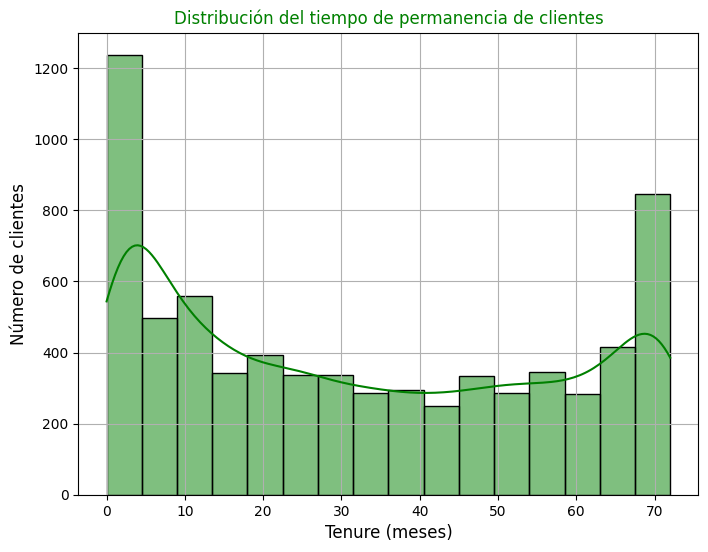

In [172]:
# Histograma de la variable 'tenure'
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.histplot(df['tenure'], kde=True, color='g') #Lo realizamos con seaborn debido a que genera la envolvente con kde
plt.title('Distribución del tiempo de permanencia de clientes', fontsize=12,color='g',loc='center' )
plt.xlabel('Tenure (meses)', fontsize=12)
plt.ylabel('Número de clientes', fontsize=12)
plt.grid(True)
plt.show()

Interpretacion del grafico:
Este histograma muestra la distribución de la duración del tiempo de permanencia de los clientes en la compañia.
Hay un pico considerable de clientes que tienen una permanencia muy corta (alrededor de 0 a 5 meses). Esto sugiere que muchos clientes abandonan el servicio poco después de comenzar, lo que podría indicar problemas iniciales con el servicio o que no satisface sus expectativas.
Después de ese pico inicial, el número de clientes disminuye progresivamente hasta alcanzar un nivel más bajo alrededor de los 30 a 40 meses. Luego, se estabiliza, lo que puede indicar que aquellos clientes que superan los primeros meses tienden a quedarse por más tiempo.Hay un segundo pico alrededor de los 70 meses de permanencia. Esto sugiere que, si los clientes permanecen durante ese tiempo, es muy probable que continúen con el servicio a largo plazo, quizás porque ya están bien integrados o satisfechos con los beneficios a largo plazo del servicio.

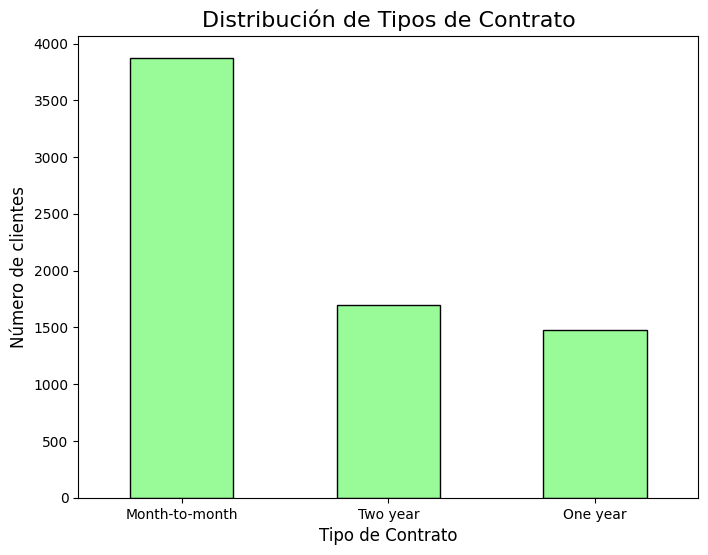

In [173]:
# Gráfico de barras para la variable 'Contract'
plt.figure(figsize=(8, 6))
df['Contract'].value_counts().plot(kind='bar', color='palegreen', edgecolor='black')
plt.title('Distribución de Tipos de Contrato', fontsize=16)
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Número de clientes', fontsize=12)
plt.xticks(rotation=0)
plt.show()

La mayoría de los clientes tienen un contrato de mes a mes, representado por el valor más alto, cercano a 3500 clientes. Esto podría sugerir que muchos clientes prefieren la flexibilidad de un contrato mensual, que les permite cancelar o renovar el servicio con mayor facilidad. Hay significativamente menos clientes con contratos a largo plazo (un año o dos años). Esto sugiere que una menor proporción de los clientes opta por comprometerse con contratos a largo plazo, lo que podría deberse a la preferencia por la flexibilidad o a la percepción de riesgo en un compromiso más largo.

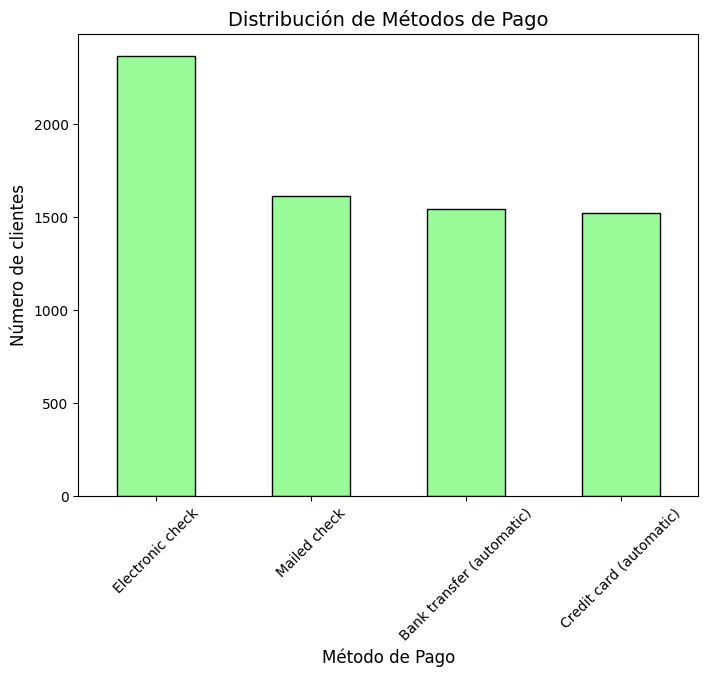

In [174]:
plt.figure(figsize=(8, 6))
df['PaymentMethod'].value_counts().plot(kind='bar', color='palegreen', edgecolor='black')
plt.title('Distribución de Métodos de Pago', fontsize=14)
plt.xlabel('Método de Pago', fontsize=12)
plt.ylabel('Número de clientes', fontsize=12)
plt.xticks(rotation=45)
plt.show()

El método de pago más utilizado por los clientes es el cheque electrónico, con más de 2000 clientes. Esto podría deberse a la facilidad o conveniencia percibida por los usuarios al utilizar este método.
Los métodos de pago automáticos, como la transferencia bancaria y la tarjeta de crédito, tienen una cantidad de usuarios bastante similar, aunque están por debajo del cheque electrónico. Esto puede sugerir que, si bien los pagos automáticos son populares, no son la opción preferida para la mayoría de los clientes.

<ipython-input-175-68e9bf495afb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='tenure', data=df, palette='Greens')


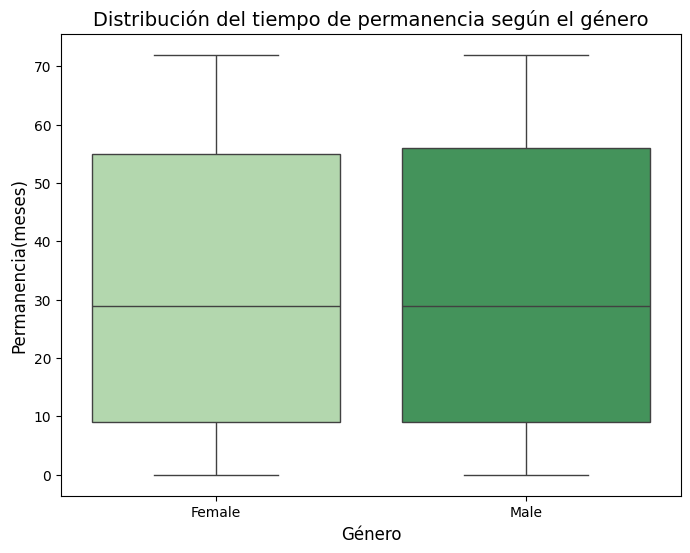

In [175]:
# Boxplot de tenure según el género
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='tenure', data=df, palette='Greens')
plt.title('Distribución del tiempo de permanencia según el género', fontsize=14)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Permanencia(meses)', fontsize=12)
plt.show()




Tanto los hombres como las mujeres presentan patrones de permanencia muy parecidos. Esto podría indicar que las estrategias de retención no necesitan ser diferenciadas por género

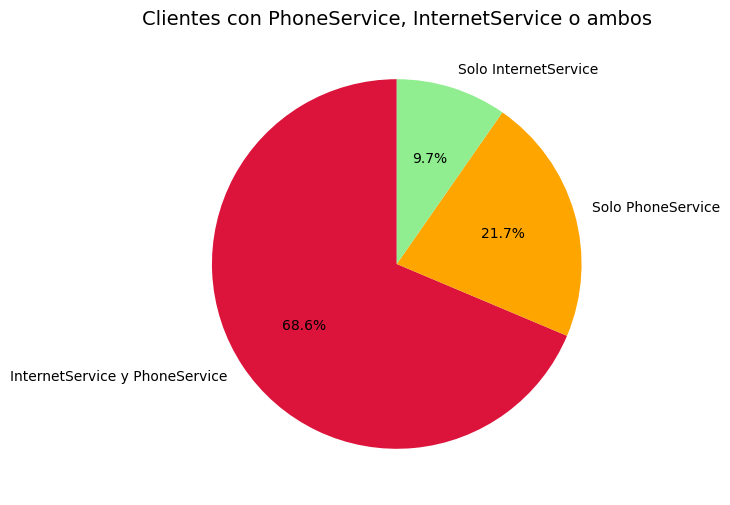

In [176]:
#Grafico de tortas para verificar el porcentaje de clientes con PhoneService, InternetService o ambos
df['ServiceStatus'] = df.apply(lambda row:
                               'InternetService y PhoneService' if row['PhoneService'] == 'Yes' and row['InternetService'] != 'No' else
                               'Solo PhoneService' if row['PhoneService'] == 'Yes' and row['InternetService'] == 'No' else
                               'Solo InternetService' if row['PhoneService'] == 'No' and row['InternetService'] != 'No' else
                               'Ninguno', axis=1)
plt.figure(figsize=(8, 6))
df['ServiceStatus'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['crimson', 'orange', 'lightgreen', 'orange'])
plt.title('Clientes con PhoneService, InternetService o ambos', fontsize=14)
plt.ylabel('')
plt.show()


El 68.6% de los clientes tienen InternetService y PhoneService. Este es el grupo más grande, lo que indica que la mayoría de los clientes prefieren tener ambos servicios, posiblemente porque resulta más conveniente o ventajoso en términos de precio y funcionalidad. Dado que la mayoría de los clientes opta por ambos servicios, podría ser una buena estrategia seguir promoviendo y ofreciendo descuentos en paquetes que incluyan InternetService y PhoneService. Esto parece ser lo que más atrae a los clientes.

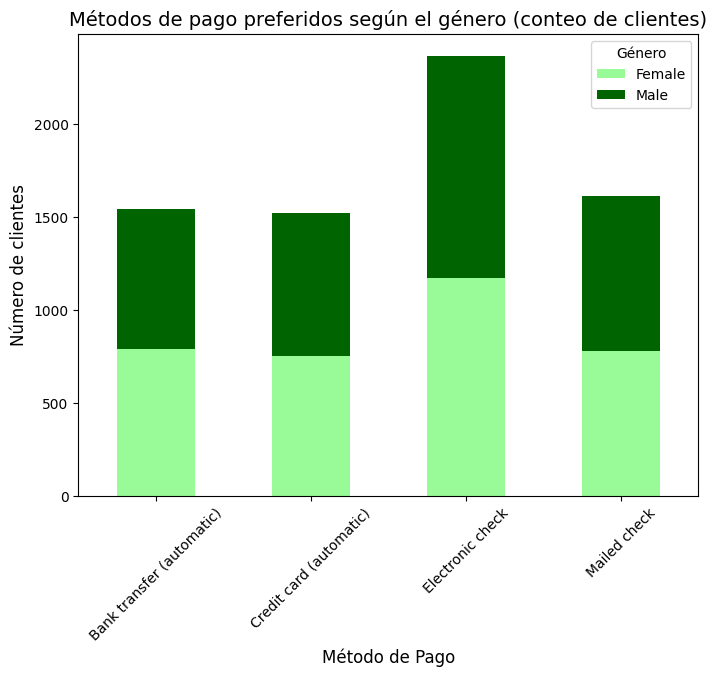

In [177]:
# Agrupamos por género y método de pago, y contamos el numero de ocurrencias
payment_gender_grouped = df.groupby(['gender', 'PaymentMethod']).size().unstack().T
# Gráfico de barras apiladas para mostrar los métodos de pago según el género
payment_gender_grouped.plot(kind='bar', stacked=True, figsize=(8, 6), color=['palegreen', 'darkgreen'])
plt.title('Métodos de pago preferidos según el género (conteo de clientes)', fontsize=14)
plt.xlabel('Método de Pago', fontsize=12)
plt.ylabel('Número de clientes', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Género', loc='upper right')
plt.show()

La distribución entre géneros es relativamente equilibrada en todos los métodos de pago. Esto sugiere que no hay una diferencia significativa en las preferencias de pago entre hombres y mujeres, lo que podría indicar que los factores que influyen en la elección del método de pago son comunes a todos los clientes, independientemente del género.

El 53.3% de los clientes con PhoneService no tienen líneas múltiples. Esto indica que una ligera mayoría de los clientes prefieren o necesitan solo una línea telefónica.El 46.7% de los clientes con PhoneService sí tienen líneas múltiples. Aunque es una proporción un poco menor que aquellos sin líneas múltiples, sigue siendo un número significativo, lo que podría indicar que casi la mitad de los clientes valoran tener más de una línea telefónica.

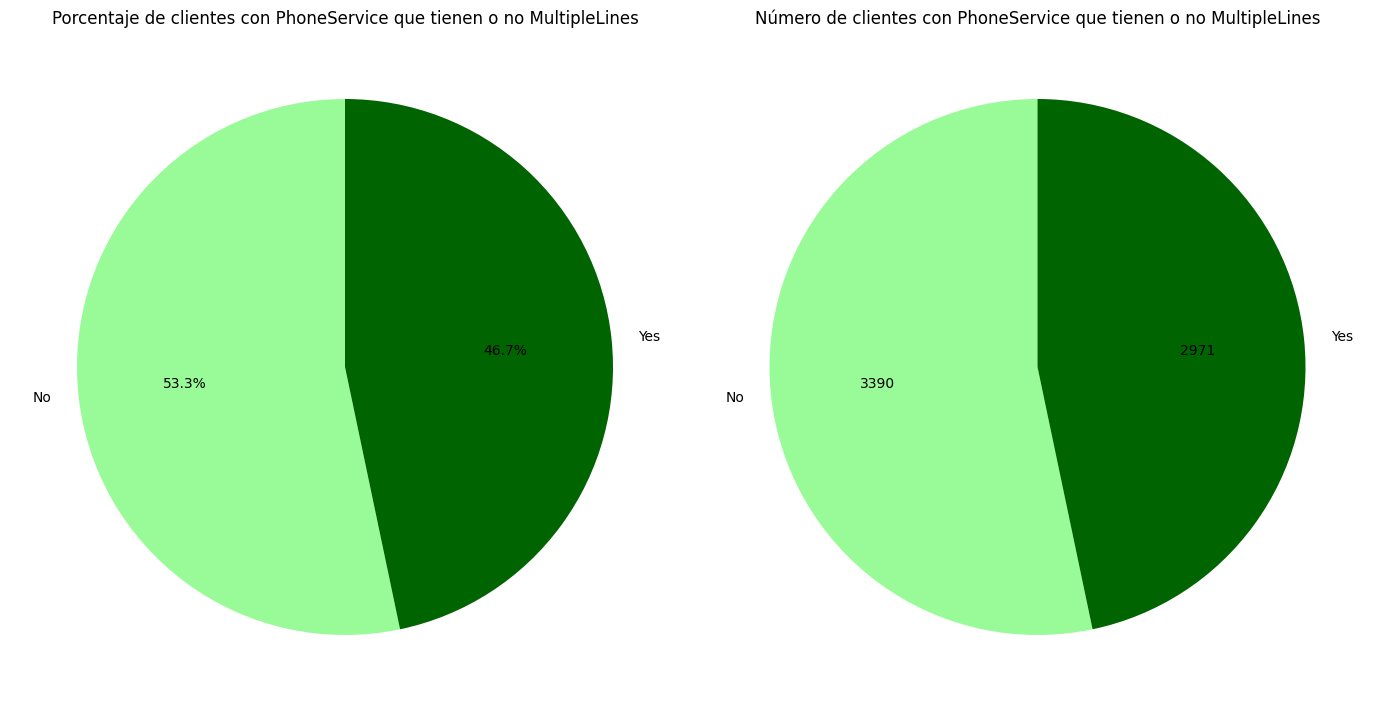

In [178]:
multiple_lines_count = phone_service_df['MultipleLines'].value_counts()

# Crear subplots: gráfico de torta con porcentaje y gráfico de torta con número de clientes
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Gráfico 1: Torta con porcentaje
axs[0].pie(multiple_lines_count, labels=multiple_lines_count.index, autopct='%1.1f%%', startangle=90, colors=['palegreen', 'darkgreen'])
axs[0].set_title('Porcentaje de clientes con PhoneService que tienen o no MultipleLines')

# Gráfico 2: Torta con número de clientes (autopct --> FUENTE: ChatGPT)
axs[1].pie(multiple_lines_counts, labels=multiple_lines_counts.index, autopct=lambda p: '{:.0f}'.format(p * sum(multiple_lines_counts) / 100), startangle=90, colors=['palegreen', 'darkgreen']) #
axs[1].set_title('Número de clientes con PhoneService que tienen o no MultipleLines')

# Mostrar los gráficos
plt.tight_layout()
plt.show()
# Se consideraron tanto los clientes actuales como las personas que ya no son clientes.

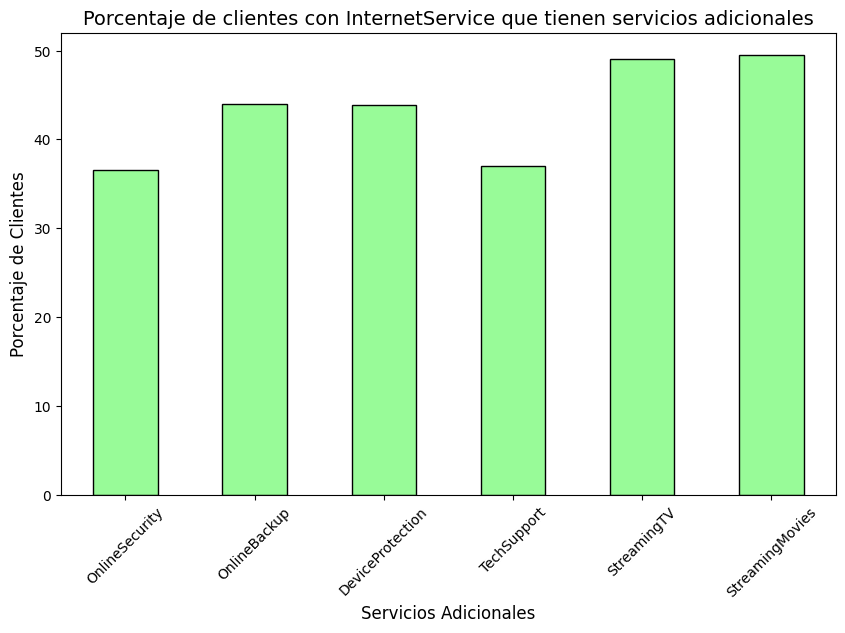

In [179]:
internet_service_df = df[df['InternetService'] != 'No']
# Lista de servicios adicionales
servicios = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
# Calcular los porcentajes de clientes que tienen cada servicio adicional
servicios_counts = internet_service_df[servicios].apply(lambda x: (x == 'Yes').sum())
services_percentage = (servicios_counts / len(internet_service_df)) * 100
# Gráfico de barras para los porcentajes de servicios adicionales
plt.figure(figsize=(10, 6))
services_percentage.plot(kind='bar', color='palegreen', edgecolor='black')
plt.title('Porcentaje de clientes con InternetService que tienen servicios adicionales', fontsize=14)
plt.xlabel('Servicios Adicionales', fontsize=12)
plt.ylabel('Porcentaje de Clientes', fontsize=12)
plt.xticks(rotation=45)
plt.show()

La alta adopción de servicios de StreamingTV y StreamingMovies sugiere que los clientes valoran mucho el acceso a contenido de entretenimiento como complemento de su servicio de Internet. Esto puede reflejar una tendencia general hacia el consumo de contenido en línea. Aunque menos populares, los servicios de OnlineSecurity y TechSupport siguen siendo utilizados por una porción considerable de los clientes. Esto puede señalar una oportunidad para mejorar o promover estos servicios adicionales, particularmente para clientes que valoran la seguridad en línea y el soporte técnico.